In [1]:
# %%
import os, sys, glob
from nilearn import image
from nilearn import plotting
import numpy as np
import pandas as pd
import h5py
from scipy import io
import matplotlib.pyplot as plt
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('Reds')

%matplotlib inline

sys.path.append('/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages')
import rsatoolbox
import rsatoolbox.data as rsd
import rsatoolbox.rdm as rsr
from rsatoolbox.model import ModelFixed
from rsatoolbox.inference import eval_fixed
from matplotlib.colors import LinearSegmentedColormap
from scipy.spatial.distance import pdist, squareform
import math
import re
from sklearn.manifold import MDS

## model cue stim

In [5]:
np.arange(-1, 2)

array([-1,  0,  1])

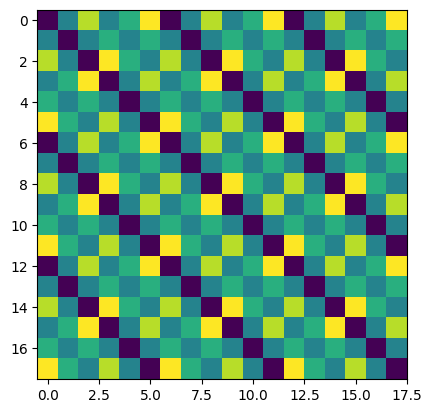

In [2]:
import numpy as np

# Generate the meshgrid
c, t, s = np.meshgrid(np.arange(0,2), np.arange(-1,2), np.arange(-1, 2))

s_2d = s.reshape(-1, 1)
c_2d = c.reshape(-1, 1)
t_2d = t.reshape(-1, 1)

xyz_cue = np.hstack((s_2d, c_2d)) # ,t_2d))
# plt.imshow(xyz_cue)

model_features = rsatoolbox.data.Dataset(np.array(xyz_cue))
model_cuestim = rsatoolbox.rdm.calc_rdm(model_features)

# rdm_cuestim = squareform(pdist(xyz_cue))
plt.imshow(squareform(pdist(xyz_cue)))



## maybe not

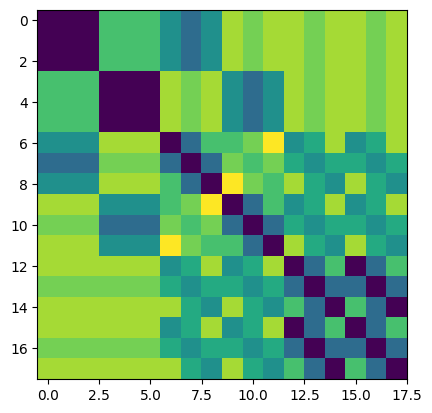

In [3]:

stim = np.array([1, 0, -1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

cst = np.vstack((c,s,t)).T
plt.imshow(cst)
# rdm = squareform(pdist(cst))
# plt.imshow(rdm)

c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
xy = np.concatenate([
    np.dot(np.dot(cst[:6,], c1), c1.T),
    np.dot(np.dot(cst[6:12,], c2), c2.T),
    np.dot(np.dot(cst[12:,], c3), c3.T)], axis=0)
plt.imshow(xy)
rdm = squareform(pdist(xy))
plt.imshow(rdm)


## orthogonal

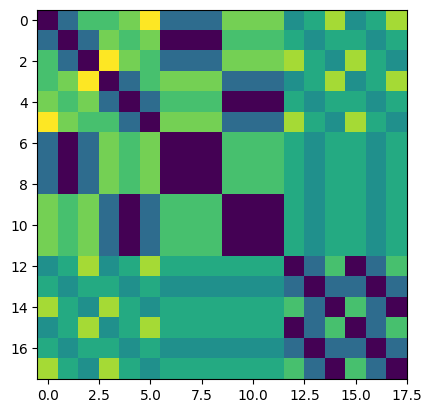

In [6]:

stim = np.array([1, 0, -1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)
# rdm = squareform(pdist(cst))
# plt.imshow(rdm)

c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
xy = np.concatenate([
    np.dot(np.dot(tcs[:6,], c1), c1.T),
    np.dot(np.dot(tcs[6:12,], c2), c2.T),
    np.dot(np.dot(tcs[12:,], c3), c3.T)], axis=0)

orthogonal_xy = np.concatenate([
    np.dot(np.dot(tcs[:6,], c3), c3.T),
    np.dot(np.dot(tcs[6:12,], c2), c2.T),
    np.dot(np.dot(tcs[12:,], c1), c1.T)], axis=0)


plt.imshow(orthogonal_xy)

model_features = rsatoolbox.data.Dataset(np.array(orthogonal_xy))
model_orthogonal = rsatoolbox.rdm.calc_rdm(model_features)

# rdm_orthogonal = squareform(pdist(xy))
plt.imshow(squareform(pdist(orthogonal_xy)))


## stim task

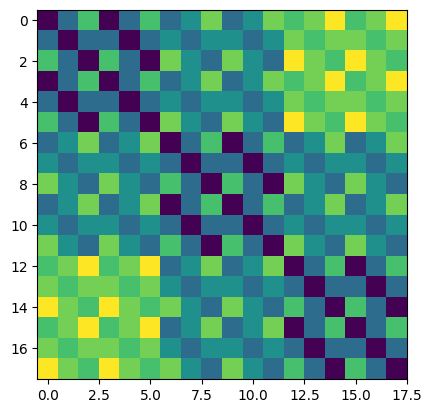

In [7]:

stim = np.array([1,2,3])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)
# rdm = squareform(pdist(cst))
# plt.imshow(rdm)

c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
stim_xy = np.concatenate([
    np.dot(np.dot(tcs[:6,], c1), c1.T),
    np.dot(np.dot(tcs[6:12,], c1), c1.T),
    np.dot(np.dot(tcs[12:,], c1), c1.T)], axis=0)
plt.imshow(stim_xy)

model_features = rsatoolbox.data.Dataset(np.array(stim_xy))
model_stimtask = rsatoolbox.rdm.calc_rdm(model_features)


# rdm_stimtask = squareform(pdist(xy))
plt.imshow(squareform(pdist(stim_xy)))


## cue

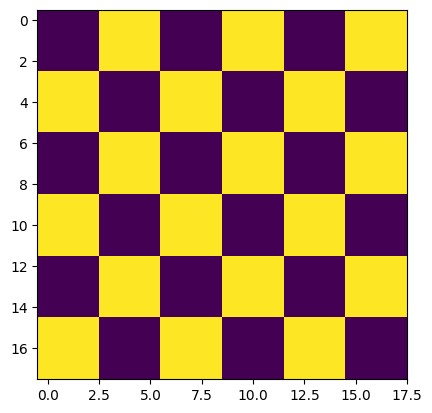

In [8]:

stim = np.array([1, 0, -1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)
# rdm = squareform(pdist(cst))
# plt.imshow(rdm)

c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
c4 = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])
cue_xy = np.concatenate([
    np.dot(np.dot(tcs[:6,], c4), c4.T),
    np.dot(np.dot(tcs[6:12,], c4), c4.T),
    np.dot(np.dot(tcs[12:,], c4), c4.T)], axis=0)
plt.imshow(cue_xy)

model_features = rsatoolbox.data.Dataset(np.array(cue_xy))
model_cue = rsatoolbox.rdm.calc_rdm(model_features)

# rdm_cue = squareform(pdist(xy))
plt.imshow(squareform(pdist(cue_xy)))


## stim

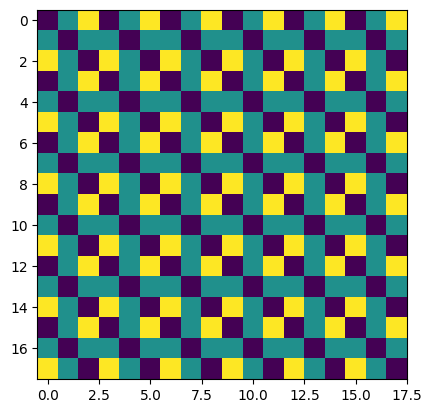

In [11]:

stim = np.array([1, 0, -1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)

c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
c4 = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])
c5 = np.array([[0,0,0],
              [0,0,0],
              [0,0,1]])
stim_xy = np.concatenate([
    np.dot(np.dot(tcs[:6,], c5),np.eye(3)),
    np.dot(np.dot(tcs[6:12,], c5), np.eye(3)),
    np.dot(np.dot(tcs[12:,], c5), np.eye(3))], axis=0)
plt.imshow(xy)

model_features = rsatoolbox.data.Dataset(np.array(xy))
model_stim = rsatoolbox.rdm.calc_rdm(model_features)

# rdm_cue = squareform(pdist(xy))
plt.imshow(squareform(pdist(stim_xy)))

# embedding = MDS(n_components=3,dissimilarity='precomputed')
# X_transformed = embedding.fit_transform(squareform(pdist(stim_xy))) # where X is your RDM
# plt.scatter(X_transformed[:,0], X_transformed[:,1])
# plt.scatter(X_transformed[:,1], X_transformed[:,2])

## grid

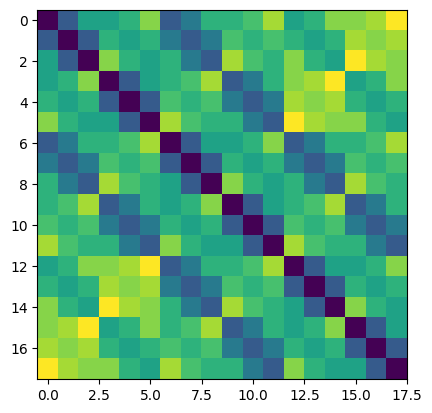

In [13]:
stim = np.array([1,0,-1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)
grid_xy = tcs
model_features = rsatoolbox.data.Dataset(np.array(tcs))
model_grid = rsatoolbox.rdm.calc_rdm(model_features)

# rdm_grid = squareform(pdist(tcs))
plt.imshow(squareform(pdist(grid_xy)))

# embedding = MDS(n_components=3,dissimilarity='precomputed')
# X_transformed = embedding.fit_transform(squareform(pdist(grid_xy))) # where X is your RDM
# plt.scatter(X_transformed[:,0], X_transformed[:,1])
# plt.scatter(X_transformed[:,1], X_transformed[:,2])

## rotation grid

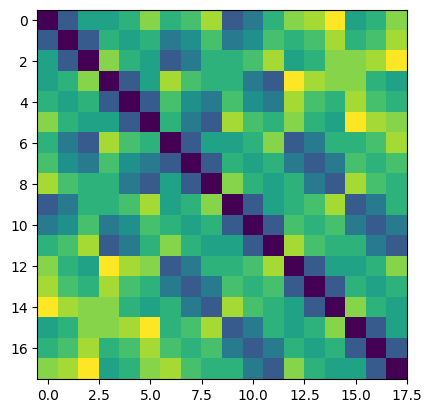

In [73]:
stim = np.array([1,0,-1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)

c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
c4 = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])
c5 = np.array([[0,0,0],
              [0,0,0],
              [0,0,1]])
rot = np.array([[1,0,0],
                [0, np.cos(np.deg2rad(90)), np.sin(np.deg2rad(90))],
                [0, -np.sin(np.deg2rad(90)), np.cos(np.deg2rad(90))]])

rotationgrid_xy = np.concatenate([
    np.dot(tcs[:6,], rot),
    tcs[6:12,],
    tcs[12:,]],
    axis=0)
plt.imshow(rotationgrid_xy)

model_features = rsatoolbox.data.Dataset(np.array(rotationgrid_xy))
model_rotationgrid = rsatoolbox.rdm.calc_rdm(model_features)

# rdm = squareform(pdist(xy))
plt.imshow(squareform(pdist(rotationgrid_xy)))

# embedding = MDS(n_components=3,dissimilarity='precomputed')
# X_transformed = embedding.fit_transform(squareform(pdist(rotationgrid_xy))) # where X is your RDM
# plt.scatter(X_transformed[:,0], X_transformed[:,1])
# plt.scatter(X_transformed[:,1], X_transformed[:,2])

## diagonal

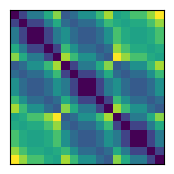

In [15]:

stim = np.array([1,0,-1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
# plt.imshow(tcs)
P = np.array([[1,0],[0, np.cos(np.deg2rad(45))],[0, np.sin(np.deg2rad(45))]])
diagonal_xy = np.dot(tcs, P)
# plt.imshow(xy)
model_features = rsatoolbox.data.Dataset(np.array(diagonal_xy))
model_diagonal = rsatoolbox.rdm.calc_rdm(model_features)

rsatoolbox.vis.rdm_plot.show_rdm(model_diagonal)

# rdm_diagonal = squareform(pdist(xy))
plt.imshow(squareform(pdist(diagonal_xy)))

# embedding = MDS(n_components=3,dissimilarity='precomputed')
# X_transformed = embedding.fit_transform(squareform(pdist(diagonal_xy))) # where X is your RDM
# plt.scatter(X_transformed[:,0], X_transformed[:,1])
# plt.scatter(X_transformed[:,1], X_transformed[:,2])

## parallel

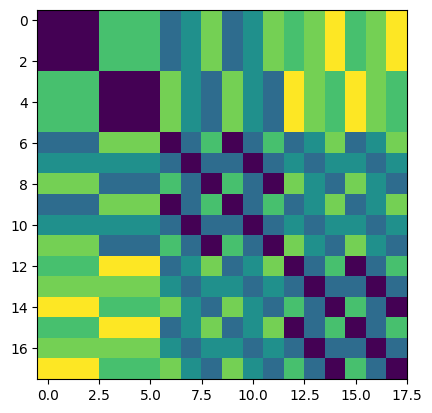

In [16]:
stim = np.array([1,0,-1])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

tcs = np.vstack((t,c,s)).T
plt.imshow(tcs)
# rdm = squareform(pdist(tcs))
# plt.imshow(rdm)


c1 = np.array([[1,0,0],
              [0,0,0],
              [0,0,1]])
c2 = np.array([[1,0,0],
              [0,1,0],
              [0,0,0]])
c3 = np.array([[0,0,0],
              [0,1,0],
              [0,0,1]])
c4 = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])
c5 = np.array([[0,0,0],
              [0,0,0],
              [0,0,1]])
rot = np.array([[1,0,0],
                [0, np.cos(np.deg2rad(90)), np.sin(np.deg2rad(90))],
                [0, -np.sin(np.deg2rad(90)), np.cos(np.deg2rad(90))]])
result = np.dot(np.dot(tcs[:6,], c2), rot)
parallel_xy = np.concatenate([
    result,
    np.dot(tcs[6:12,], c1),
    np.dot(tcs[12:,], c1)], axis=0)

# xy = np.dot(np.dot(tcs, rot), rot.T)
# plt.imshow(xy)

model_feaures = rsatoolbox.data.Dataset(np.array(parallel_xy))
model_parallel = rsatoolbox.rdm.calc_rdm(model_feaures)

# rdm_parallel = squareform(pdist(xy))
plt.imshow(squareform(pdist(parallel_xy)))


# plot all

In [ ]:
stim = np.array([30,50,70])
cue = np.array([ 1, 1, 1, -1, -1, -1])
task = np.array([1, 0, -1])
t = np.repeat(task, 6)
s = np.tile(stim, 6)
c = np.tile(cue, 3)

1.0 1.414213562373095 b ^
1.0 0.7071067811865476 g s
1.0 1.1102230246251565e-16 g s
1.0 -1.1102230246251565e-16 g s
1.0 -0.7071067811865476 g s
1.0 -1.414213562373095 g s
0.0 1.414213562373095 g s
0.0 0.7071067811865476 r o
0.0 1.1102230246251565e-16 r o
0.0 -1.1102230246251565e-16 r o
0.0 -0.7071067811865476 r o
0.0 -1.414213562373095 r o
-1.0 1.414213562373095 r o
-1.0 0.7071067811865476 b ^
-1.0 1.1102230246251565e-16 b ^
-1.0 -1.1102230246251565e-16 b ^
-1.0 -0.7071067811865476 b ^


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


AttributeError: module 'matplotlib.pyplot' has no attribute 'Line3DCollection'

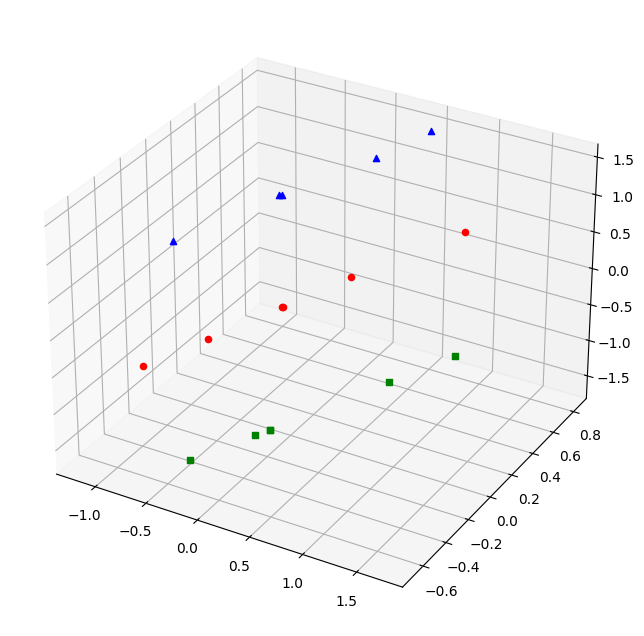

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

# Define the colors and markers for each level of cue_xy
colors = ['r', 'g', 'b']  # replace with your desired colors
markers = ['o', 's', '^']  # replace with your desired markers

# Generate a dictionary mapping cue_xy values to colors/markers
cue_to_color = {0: colors[0], 1: colors[1], -1: colors[2]}
cue_to_marker = {0: markers[0], 1: markers[1], -1: markers[2]}

# Plot the 3D MDS plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
df = diagonal_xy
embedding = MDS(n_components=3, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(squareform(pdist(df)))
# surf._facecolors2d = surf._facecolor3d
# surf._edgecolors2d = surf._edgecolor3d
# Create a list of line segments connecting the markers
lines = []
for i in range(len(df)-1):
    x, y, z = X_transformed[i]
    testx, testy =df[i]
    print(testx,testy,c,m)
    next_x, next_y, next_z = X_transformed[i+1]
    
    c = cue_to_color[df[i][0]]
    m = cue_to_marker[df[i][0]]
    line = [(x, y, z), (next_x, next_y, next_z)]
    lines.append(line)
    ax.scatter(x, y, z, c=c, marker=m)

# Add the line segments to the plot
lc = plt.Line3DCollection(lines, colors='black', linewidths=0.5)
ax.add_collection(lc)

plt.show()


In [95]:
import pandas as pd

df = pd.DataFrame({
    # 'x': X_transformed[:, 0],
    # 'y': X_transformed[:, 1],
    # 'z': X_transformed[:, 2],
    'color': ['#941100', '#941100','#941100', '#932238','#932238', '#932238',
              '#009411','#009411','#009411','#496C5D','#496C5D','#496C5D',
              '#110094','#110094','#110094','#372E78','#372E78','#372E78'],
    'marker': ['o', 'o', 'o', 'x','x','x',
               'o', 'o', 'o' ,'x','x','x',
               'o', 'o', 'o', 'x','x','x',],
    'size': [10, 30, 50, 10, 30, 50,
             10, 30, 50, 10, 30, 50,
             10, 30, 50, 10, 30, 50,]
})


In [96]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
from mpl_toolkits.mplot3d.art3d import Line3DCollection


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalize

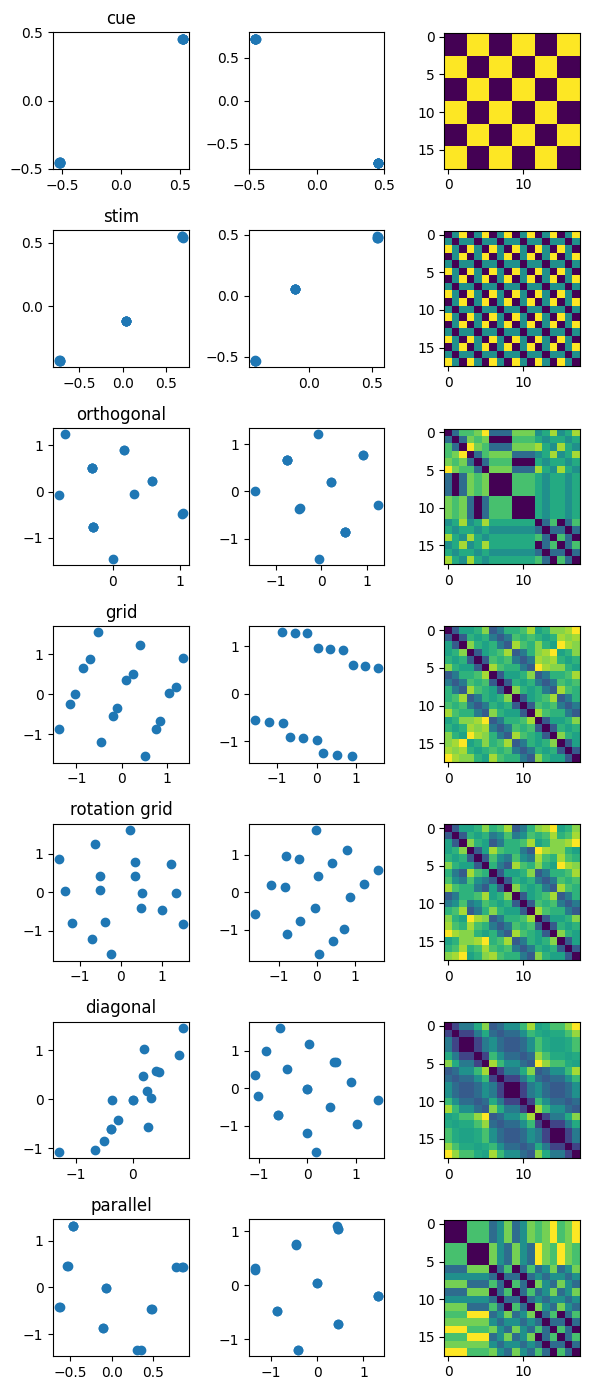

In [33]:
import matplotlib.pyplot as plt

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(7, 3, figsize=(6, 14))
embedding = MDS(n_components=3,dissimilarity='precomputed')

# Plot the first subplot
X_transformed = embedding.fit_transform(squareform(pdist(cue_xy))) 
axs[0, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[0, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[0, 2].imshow(squareform(pdist(cue_xy)))
axs[0, 0].set_title("cue")

# Plot the second subplot
X_transformed = embedding.fit_transform(squareform(pdist(stim_xy))) 
axs[1, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[1, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[1, 2].imshow(squareform(pdist(stim_xy)))
axs[1, 0].set_title("stim")

# Plot the third subplot
X_transformed = embedding.fit_transform(squareform(pdist(orthogonal_xy))) 
axs[2, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[2, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[2, 2].imshow(squareform(pdist(orthogonal_xy)))
axs[2, 0].set_title("orthogonal")

# Plot the fourth subplot
X_transformed = embedding.fit_transform(squareform(pdist(grid_xy))) 
axs[3, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[3, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[3, 2].imshow(squareform(pdist(grid_xy)))
axs[3, 0].set_title("grid")

# Plot the fifth subplot
X_transformed = embedding.fit_transform(squareform(pdist(rotationgrid_xy))) 
axs[4, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[4, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[4, 2].imshow(squareform(pdist(rotationgrid_xy)))
axs[4, 0].set_title("rotation grid")

# Plot the sixth subplot
X_transformed = embedding.fit_transform(squareform(pdist(diagonal_xy))) 
axs[5, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[5, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[5, 2].imshow(squareform(pdist(diagonal_xy)))
axs[5, 0].set_title("diagonal")

# Plot the seventh subplot
X_transformed = embedding.fit_transform(squareform(pdist(parallel_xy))) 
axs[6, 0].scatter(X_transformed[:, 0], X_transformed[:, 1])
axs[6, 1].scatter(X_transformed[:, 1], X_transformed[:, 2])
axs[6, 2].imshow(squareform(pdist(parallel_xy)))
axs[6, 0].set_title("parallel")
# Remoㅍe the unused subplot
# fig.delaxes(axs[1, 3])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalize

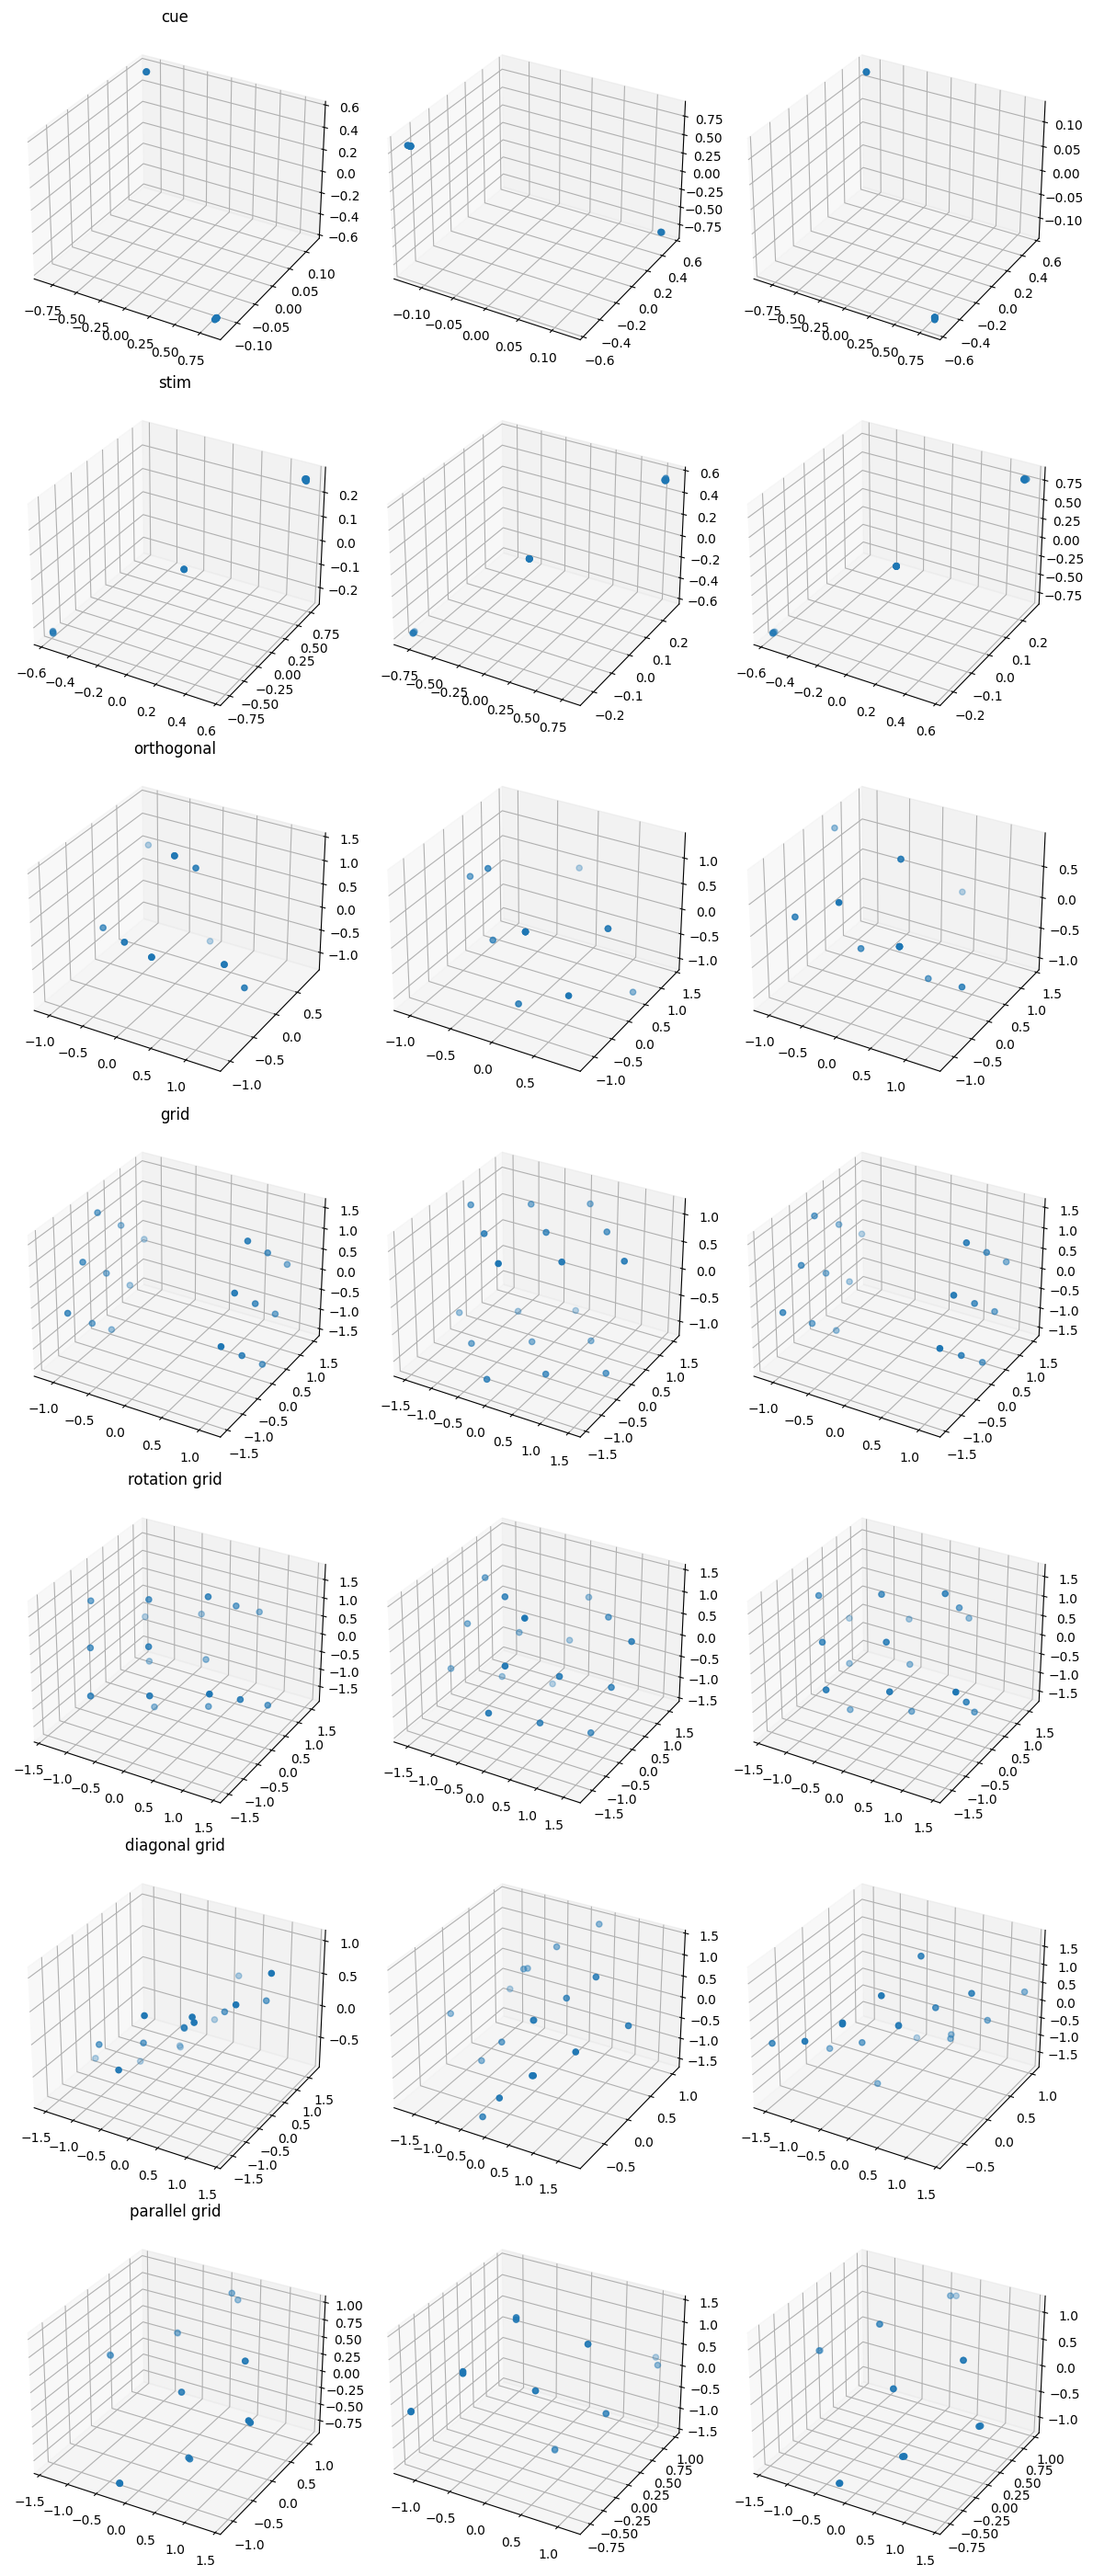

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 2x4 grid of subplots
fig = plt.figure(figsize=(12, 28))
embedding = MDS(n_components=3,dissimilarity='precomputed')

# Create 3D axes
axs = [fig.add_subplot(7, 3, i+1, projection='3d') for i in range(21)]

# Plot the first subplot
X_transformed = embedding.fit_transform(squareform(pdist(cue_xy))) 
axs[0].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[1].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[2].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[0].set_title("cue")

# Plot the second subplot
X_transformed = embedding.fit_transform(squareform(pdist(stim_xy))) 
axs[3].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[4].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[5].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[3].set_title("stim")

# Plot the third subplot
X_transformed = embedding.fit_transform(squareform(pdist(orthogonal_xy))) 
axs[6].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[7].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[8].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[6].set_title("orthogonal")

# Plot the fourth subplot
X_transformed = embedding.fit_transform(squareform(pdist(grid_xy))) 
axs[9].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[10].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[11].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[9].set_title("grid")

# Plot the fifth subplot
X_transformed = embedding.fit_transform(squareform(pdist(rotationgrid_xy))) 
axs[12].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[13].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[14].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[12].set_title("rotation grid")

# # Plot the sixth subplot
X_transformed = embedding.fit_transform(squareform(pdist(diagonal_xy))) 
axs[15].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[16].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[17].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[15].set_title("diagonal grid")

# # Plot the sixth subplot
X_transformed = embedding.fit_transform(squareform(pdist(parallel_xy))) 
axs[18].scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2])
axs[19].scatter(X_transformed[:, 1], X_transformed[:, 2], X_transformed[:, 0])
axs[20].scatter(X_transformed[:, 0], X_transformed[:, 2], X_transformed[:, 1])
axs[18].set_title("parallel grid")

# Adjust the spacing between subplots
fig.tight_layout()

# Show the figure
plt.show()

/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


ValueError: could not convert string to float: '#009411'

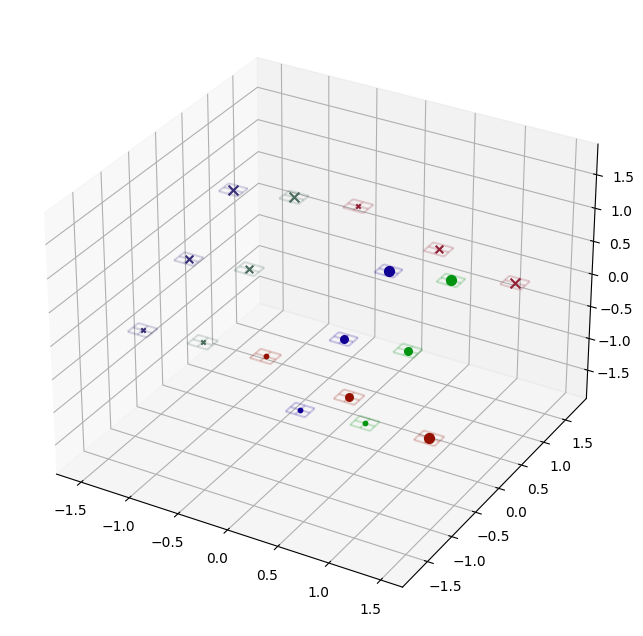

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

# Define a colormap
# cmap = plt.cm.get_cmap('cool')
cmap = ListedColormap(df['color'])

# Plot the 3D MDS plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

model = rotationgrid_xy
embedding = MDS(n_components=3, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(squareform(pdist(model)))

# Create a list of dictionaries containing coordinates, color, marker, and size information for each point
points = []
for i in range(len(model)):
    x, y, z = X_transformed[i]
    c = df.loc[i, 'color']
    m = df.loc[i, 'marker']
    s = df.loc[i, 'size']
    points.append({'coord': (x, y, z), 'color': c, 'marker': m, 'size': s})

# Sort the list of dictionaries by color, marker, and size
points_sorted = sorted(points, key=lambda p: (p['color'], p['marker'], p['size']))

# Create a list of line segments connecting adjacent points with the same color, marker, and size
lines = []
for i in range(len(points_sorted)-1):
    p1 = points_sorted[i]
    p2 = points_sorted[i+1]
    if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
        line = [p1['coord'], p2['coord']]
        lines.append(line)

for p in points_sorted:
    ax.scatter(*p['coord'], c=[p['color']], marker=p['marker'], s=p['size'], cmap=cmap)
    x, y, z = p['coord']
    X, Y = np.meshgrid(x + np.linspace(-0.1, 0.1, 3),
                       y + np.linspace(-0.1, 0.1, 3))
    Z = np.full_like(X, z)
    ax.plot_wireframe(X, Y, Z, color=p['color'], alpha=0.2)
# Add the line segments to the plot
lines = []
for i in range(len(points_sorted)-1):
    p1 = points_sorted[i]
    p2 = points_sorted[i+1]
    if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
        line = [p1['coord'], p2['coord']]
        lines.append(line)
        
    # Add lines connecting the specified rows
connections = [(0, 3), (1, 4), (2, 5), 
               (6, 9), (7, 10), (8, 11),
               (12,15), (13, 16), (14, 17)]
for c in connections:
    if i == c[0] and i+3 == c[1]:
        line = [points_sorted[i]['coord'], points_sorted[i+3]['coord']]
        lines.append(line)

# lc = Line3DCollection(lines, colors='black', linewidths=0.5)
# ax.add_collection(lc)

# Add a colorbar
norm = plt.Normalize(vmin=min(df['color']), vmax=max(df['color']))
cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap))
cbar.set_label('Color')

plt.show()


In [181]:
df = pd.DataFrame({
    # 'color': ['941100', '941100','941100', '932238','932238', '932238',
    #           '009411','009411','009411','496151','496151','496151',
    #           '110094','110094','110094','372178','372178','372178'],
    # 'marker': list(np.tile([1,1,1,0,0,0], 3)),
    # 'size': list(np.tile([10,30,50], 6)), 
    'task': list(np.repeat([1,0,-1], 6)),
    'cue': list(np.tile([1,1,1,0,0,0], 3)),
    'stim': list(np.tile([100,50,0], 6))
})
rot = np.array([[1,0,0],
                [0, np.cos(np.deg2rad(90)), np.sin(np.deg2rad(90))],
                [0, -np.sin(np.deg2rad(90)), np.cos(np.deg2rad(90))]])
npdf = df.apply(pd.to_numeric).to_numpy()
rotationgrid_df = np.concatenate([
    np.dot(npdf[:6,], rot),
    npdf[6:12,],
    npdf[12:,]],
    axis=0)
df_transformed = pd.DataFrame(rotationgrid_df, columns=df.columns)


WRONG

/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


pain_highcue_highstim pain_highcue_highstim pain_lowcue_highstim
[(-1.665669650401344, 0.06105664100179254, 0.47037970857654055)] [(-0.17574977799642455, 1.21618842058151, 1.2213636991707106)]
pain_highcue_medstim pain_highcue_medstim pain_lowcue_medstim
[(-1.319130358497283, 0.2508294029149074, -0.4408606253039433)] [(0.1500914565057834, 1.3763716616118133, 0.2930556021079107)]
pain_highcue_lowstim pain_highcue_lowstim pain_lowcue_lowstim
[(-0.9881600904528793, 0.38329002453628086, -1.370334002895251)] [(0.488149766197275, 1.5379822565144734, -0.6311976210644143)]
vic_highcue_highstim vic_highcue_highstim vic_lowcue_highstim
[(-0.3953146029707871, -0.4065977593179477, -1.293840997881263)] [(-1.0751635439626257, -0.7241034766604141, 0.5552938861432232)]
vic_highcue_medstim vic_highcue_medstim vic_lowcue_medstim
[(0.3403036869197998, 0.16581021134501017, -0.9258473354866865)] [(-0.33427749489757047, -0.1483060200987357, 0.9290467084811526)]
vic_highcue_lowstim vic_highcue_lowstim vic_lo

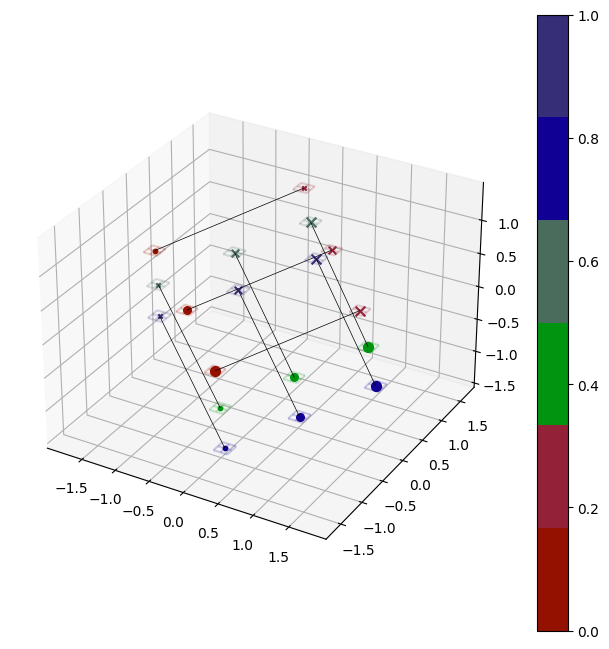

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.colors import ListedColormap
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform

df = pd.DataFrame({
    'color': ['#941100', '#941100','#941100', '#932238','#932238', '#932238',
              '#009411','#009411','#009411','#496C5D','#496C5D','#496C5D',
              '#110094','#110094','#110094','#372E78','#372E78','#372E78'],
    'marker': ['o', 'o', 'o', 'x','x','x',
               'o', 'o', 'o' ,'x','x','x',
               'o', 'o', 'o', 'x','x','x',],
    'size': list(np.tile([10,30,50], 6)), 
    'task': list(np.repeat(['pain','vicarious','cognitive'],6)),
    'cue': list(np.tile(['hC', 'hC', 'hC', 'lC', 'lC', 'lC'], 3)),
    'stim': list(np.tile(['high', 'med', 'low'], 6)), 
    'cond': ['pain_highcue_highstim','pain_highcue_medstim','pain_highcue_lowstim', 
             'pain_lowcue_highstim', 'pain_lowcue_medstim', 'pain_lowcue_lowstim',
             'vic_highcue_highstim','vic_highcue_medstim','vic_highcue_lowstim', 
             'vic_lowcue_highstim', 'vic_lowcue_medstim', 'vic_lowcue_lowstim',
             'cog_highcue_highstim','cog_highcue_medstim','cog_highcue_lowstim', 
             'cog_lowcue_highstim', 'cog_lowcue_medstim', 'cog_lowcue_lowstim']
})

# Create a custom colormap from the hexcode colors
cmap = ListedColormap(df['color'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

model = rotationgrid_xy
embedding = MDS(n_components=3, dissimilarity='precomputed')
X_transformed = embedding.fit_transform(squareform(pdist(model)))

points = []
for i in range(len(model)):
    x, y, z = X_transformed[i]
    c = df.loc[i, 'color']
    m = df.loc[i, 'marker']
    s = df.loc[i, 'size']
    condition= df.loc[i, 'cond']
    points.append({'coord': (x, y, z), 'color': c, 'marker': m, 'size': s, 'cond': condition})

points_sorted = sorted(points, key=lambda p: (p['color'], p['marker'], p['size'], p['cond']))

# lines connecting it with matching stim/cue conditions
line_tuples = [('pain_highcue_highstim','pain_lowcue_highstim'),
               ('pain_highcue_medstim','pain_lowcue_medstim'),
               ('pain_highcue_lowstim', 'pain_lowcue_lowstim'),

             ('vic_highcue_highstim','vic_lowcue_highstim'),
             ('vic_highcue_medstim','vic_lowcue_medstim'),
             ('vic_highcue_lowstim', 'vic_lowcue_lowstim'),
               
             ('cog_highcue_highstim','cog_lowcue_highstim'),
             ('cog_highcue_medstim','cog_lowcue_medstim'),
             ('cog_highcue_lowstim', 'cog_lowcue_lowstim')
              ]
lines = []
points_sorted_df = pd.DataFrame(points_sorted)
for i in range(len(points_sorted)-1):
    
    p1 = points_sorted[i]
    p2 = points_sorted[i+1]
    if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
        line = [p1['coord'], p2['coord']]
        lines.append(line)
    condition = df['cond'][i]
    for c in line_tuples:
        if condition == c[0]:
            print(condition, c[0], c[1])
            matching_rows1 = points_sorted_df.loc[points_sorted_df['cond'] == c[0]]
            matching_coords1 = matching_rows1['coord']
            matching_rows2 = points_sorted_df.loc[points_sorted_df['cond'] == c[1]]
            matching_coords2 = matching_rows2['coord']
            print(matching_coords1.values,matching_coords2.values)
            line = [matching_coords1.values[0],matching_coords2.values[0]]
            lines.append(line)

# plotting mesh grids
for p in points_sorted:
    ax.scatter(*p['coord'], c=p['color'], marker=p['marker'], s=p['size'], cmap=cmap)
    x, y, z = p['coord']
    X, Y = np.meshgrid(x + np.linspace(-0.1, 0.1, 3),
                       y + np.linspace(-0.1, 0.1, 3))
    Z = np.full_like(X, z)
    ax.plot_wireframe(X, Y, Z, color=p['color'], alpha=0.2)

lc = Line3DCollection(lines, colors='black', linewidths=0.5)
ax.add_collection(lc)

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=None, cmap=cmap))



/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalize

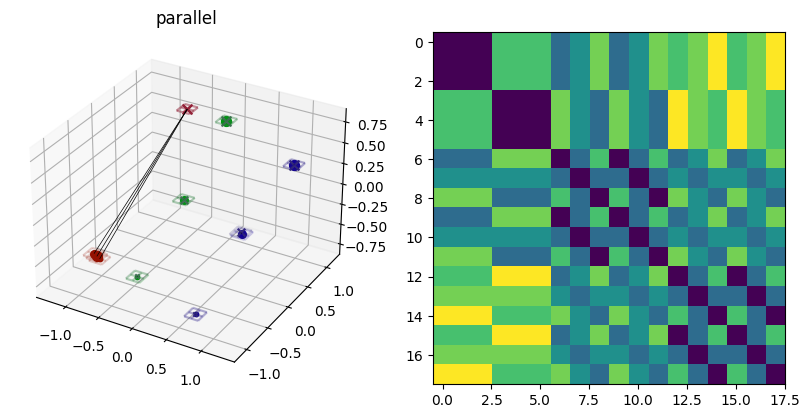

In [293]:
line_tuples = [('pain_highcue_highstim','pain_lowcue_highstim'),
               ('pain_highcue_medstim','pain_lowcue_medstim'),
               ('pain_highcue_lowstim', 'pain_lowcue_lowstim'),

             ('vic_highcue_highstim','vic_lowcue_highstim'),
             ('vic_highcue_medstim','vic_lowcue_medstim'),
             ('vic_highcue_lowstim', 'vic_lowcue_lowstim'),
               
             ('cog_highcue_highstim','cog_lowcue_highstim'),
             ('cog_highcue_medstim','cog_lowcue_medstim'),
             ('cog_highcue_lowstim', 'cog_lowcue_lowstim')
              ]

condition_df = pd.DataFrame({
    'color': ['#941100', '#941100','#941100', '#932238','#932238', '#932238',
              '#009411','#009411','#009411','#496C5D','#496C5D','#496C5D',
              '#110094','#110094','#110094','#372E78','#372E78','#372E78'],
    'marker': ['o', 'o', 'o', 'x','x','x',
               'o', 'o', 'o' ,'x','x','x',
               'o', 'o', 'o', 'x','x','x',],
    'size': list(np.tile([10,30,50], 6)), 
    'task': list(np.repeat(['pain','vicarious','cognitive'],6)),
    'cue': list(np.tile(['hC', 'hC', 'hC', 'lC', 'lC', 'lC'], 3)),
    'stim': list(np.tile(['high', 'med', 'low'], 6)), 
    'cond': ['pain_highcue_highstim','pain_highcue_medstim','pain_highcue_lowstim', 
             'pain_lowcue_highstim', 'pain_lowcue_medstim', 'pain_lowcue_lowstim',
             'vic_highcue_highstim','vic_highcue_medstim','vic_highcue_lowstim', 
             'vic_lowcue_highstim', 'vic_lowcue_medstim', 'vic_lowcue_lowstim',
             'cog_highcue_highstim','cog_highcue_medstim','cog_highcue_lowstim', 
             'cog_lowcue_highstim', 'cog_lowcue_medstim', 'cog_lowcue_lowstim']
})
cue_xy, stim_xy, orthogonal_xy, grid_xy, rotationgrid_xy, diagonal_xy, parallel_xy
# plot_MDS_grid(rotationgrid_xy, df, line_tuples)



/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


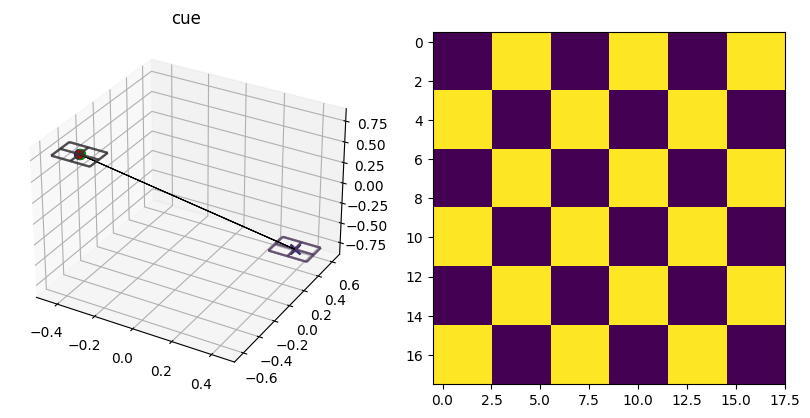

In [294]:
plot_MDS_grid_RDM(cue_xy, df, line_tuples, "cue")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


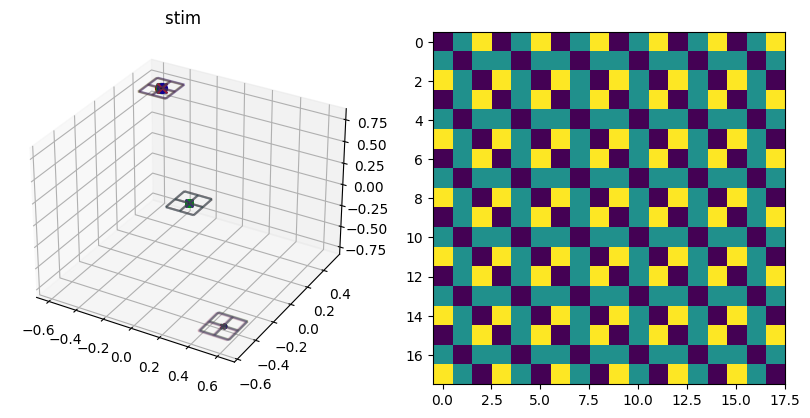

In [326]:
plot_MDS_grid_RDM(stim_xy, df, line_tuples, "stim ")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


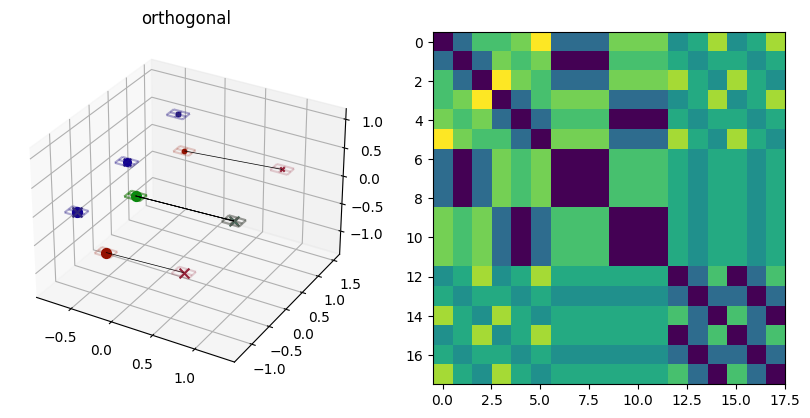

In [325]:
plot_MDS_grid_RDM(orthogonal_xy, df, line_tuples, "orthogonal")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


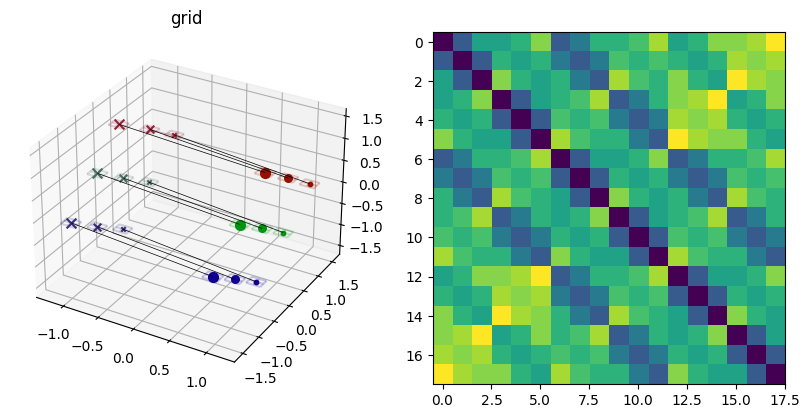

In [297]:
plot_MDS_grid_RDM(grid_xy, df, line_tuples, "grid")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


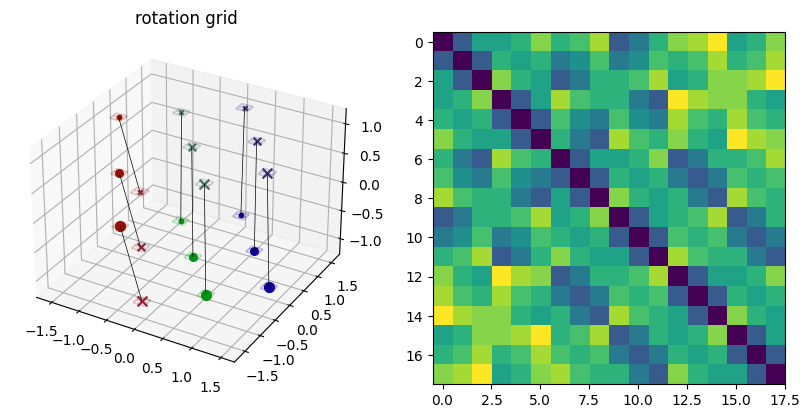

In [302]:
plot_MDS_grid_RDM(rotationgrid_xy, df, line_tuples, "rotation grid")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


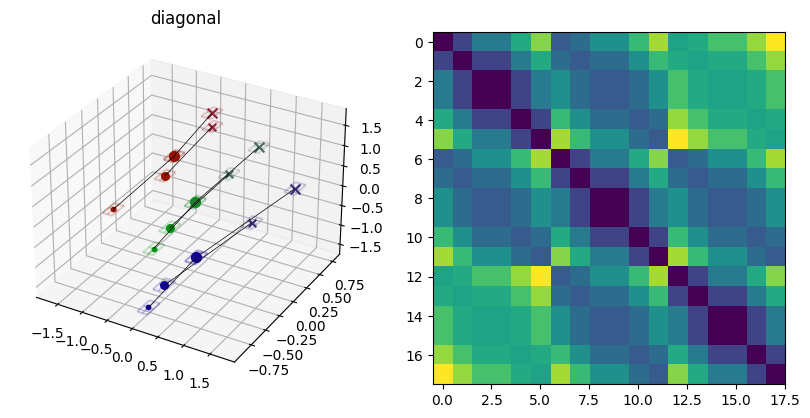

In [334]:
plot_MDS_grid_RDM(diagonal_xy, df, line_tuples, "diagonal")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


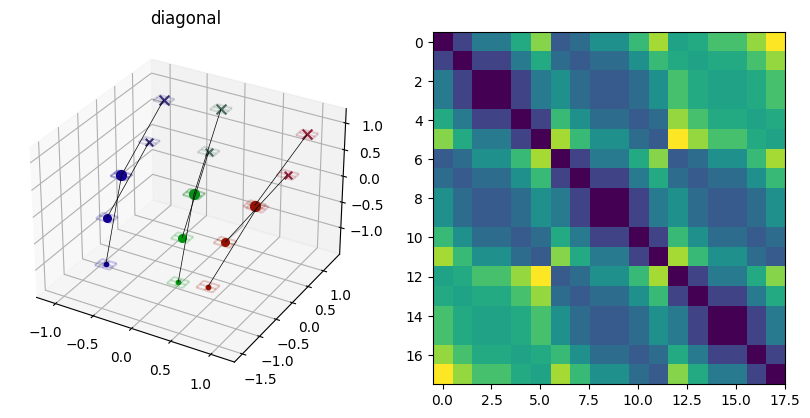

In [361]:
plot_MDS_grid_RDM(diagonal_xy, df, line_tuples, "diagonal")


/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


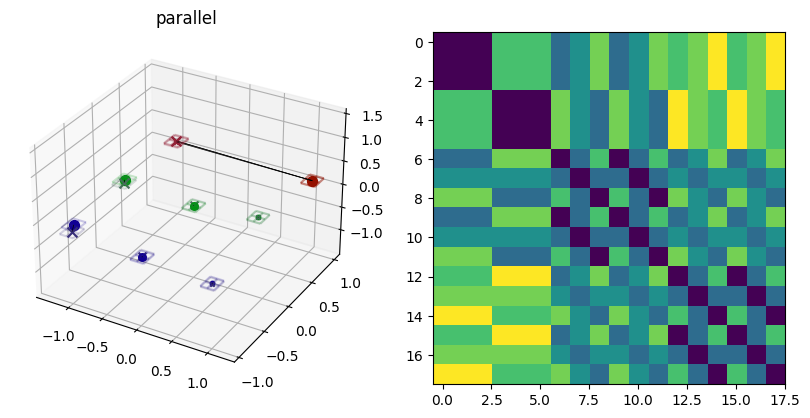

In [317]:
plot_MDS_grid_RDM(parallel_xy, df, line_tuples, "parallel")

In [272]:
def plot_MDS_grid(RDM_numpy, df, line_tuples):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Line3DCollection
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from matplotlib.colors import ListedColormap
    from sklearn.manifold import MDS
    from scipy.spatial.distance import pdist, squareform



    # Create a custom colormap from the hexcode colors
    cmap = ListedColormap(df['color'])

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    model = RDM_numpy
    embedding = MDS(n_components=3, dissimilarity='precomputed')
    X_transformed = embedding.fit_transform(squareform(pdist(model)))

    points = []
    for i in range(len(model)):
        x, y, z = X_transformed[i]
        c = df.loc[i, 'color']
        m = df.loc[i, 'marker']
        s = df.loc[i, 'size']
        condition= df.loc[i, 'cond']
        points.append({'coord': (x, y, z), 'color': c, 'marker': m, 'size': s, 'cond': condition})

    points_sorted = sorted(points, key=lambda p: (p['color'], p['marker'], p['size'], p['cond']))

    # lines connecting it with matching stim/cue conditions

    lines = []
    points_sorted_df = pd.DataFrame(points_sorted)
    for i in range(len(points_sorted)-1):
        
        p1 = points_sorted[i]
        p2 = points_sorted[i+1]
        if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
            line = [p1['coord'], p2['coord']]
            lines.append(line)
        condition = df['cond'][i]
        for c in line_tuples:
            if condition == c[0]:
                # print(condition, c[0], c[1])
                matching_rows1 = points_sorted_df.loc[points_sorted_df['cond'] == c[0]]
                matching_coords1 = matching_rows1['coord']
                matching_rows2 = points_sorted_df.loc[points_sorted_df['cond'] == c[1]]
                matching_coords2 = matching_rows2['coord']
                # print(matching_coords1.values,matching_coords2.values)
                line = [matching_coords1.values[0],matching_coords2.values[0]]
                lines.append(line)

    # plotting mesh grids
    for p in points_sorted:
        ax.scatter(*p['coord'], c=p['color'], marker=p['marker'], s=p['size'], cmap=cmap)
        x, y, z = p['coord']
        X, Y = np.meshgrid(x + np.linspace(-0.1, 0.1, 3),
                        y + np.linspace(-0.1, 0.1, 3))
        Z = np.full_like(X, z)
        ax.plot_wireframe(X, Y, Z, color=p['color'], alpha=0.2)

    lc = Line3DCollection(lines, colors='black', linewidths=0.5)
    ax.add_collection(lc)

    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=None, cmap=cmap))
    return fig

In [291]:
# def plot_MDS_grid_RDM(RDM_numpy, condition_df, line_tuples, title):
#     import pandas as pd
#     import numpy as np
#     import matplotlib.pyplot as plt
#     from mpl_toolkits.mplot3d import Axes3D
#     from mpl_toolkits.mplot3d.art3d import Line3DCollection
#     from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#     from matplotlib.colors import ListedColormap
#     from sklearn.manifold import MDS
#     from scipy.spatial.distance import pdist, squareform

#     # Create a custom colormap from the hexcode colors
#     cmap = ListedColormap(condition_df['color'])

#     fig = plt.figure(figsize=(10,5 ))
#     # ax = fig.add_subplot(111, projection='3d')
#     ax1 = fig.add_subplot(1, 2, 2)
#     ax1.imshow(squareform(pdist(RDM_numpy)))
#     ax = fig.add_subplot(1, 2, 1, projection='3d')
#     model = RDM_numpy
#     embedding = MDS(n_components=3, dissimilarity='precomputed')
#     X_transformed = embedding.fit_transform(squareform(pdist(model)))
    
#     points = []
#     for i in range(len(model)):
#         x, y, z = X_transformed[i]
#         c = condition_df.loc[i, 'color']
#         m = condition_df.loc[i, 'marker']
#         s = condition_df.loc[i, 'size']
#         condition= condition_df.loc[i, 'cond']
#         points.append({'coord': (x, y, z), 'color': c, 'marker': m, 'size': s, 'cond': condition})

#     points_sorted = sorted(points, key=lambda p: (p['color'], p['marker'], p['size'], p['cond']))

#     # lines connecting it with matching stim/cue conditions

#     lines = []
#     points_sorted_df = pd.DataFrame(points_sorted)
#     for i in range(len(points_sorted)-1):
        
#         p1 = points_sorted[i]
#         p2 = points_sorted[i+1]
#         if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
#             line = [p1['coord'], p2['coord']]
#             lines.append(line)
#         condition = condition_df['cond'][i]
#         for c in line_tuples:
#             if condition == c[0]:
#                 # print(condition, c[0], c[1])
#                 matching_rows1 = points_sorted_df.loc[points_sorted_df['cond'] == c[0]]
#                 matching_coords1 = matching_rows1['coord']
#                 matching_rows2 = points_sorted_df.loc[points_sorted_df['cond'] == c[1]]
#                 matching_coords2 = matching_rows2['coord']
#                 # print(matching_coords1.values,matching_coords2.values)
#                 line = [matching_coords1.values[0],matching_coords2.values[0]]
#                 lines.append(line)

#     # plotting mesh grids
#     for p in points_sorted:
#         ax.scatter(*p['coord'], c=p['color'], marker=p['marker'], s=p['size'], cmap=cmap)
#         x, y, z = p['coord']
#         X, Y = np.meshgrid(x + np.linspace(-0.1, 0.1, 3),
#                         y + np.linspace(-0.1, 0.1, 3))
#         Z = np.full_like(X, z)
#         ax.plot_wireframe(X, Y, Z, color=p['color'], alpha=0.2)

#     lc = Line3DCollection(lines, colors='black', linewidths=0.5)
#     ax.add_collection(lc)
#     ax.set_title(str(title))
#     plt.close()
#     # cbar = plt.colorbar(plt.cm.ScalarMappable(norm=None, cmap=cmap))
#     return fig

## Grid like plots

/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


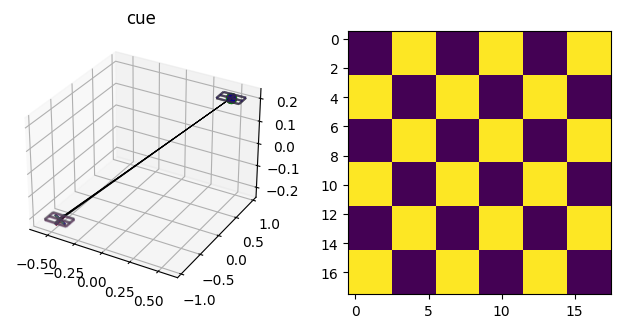

/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/h/anaconda3/envs/spacetop_datalad/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalize

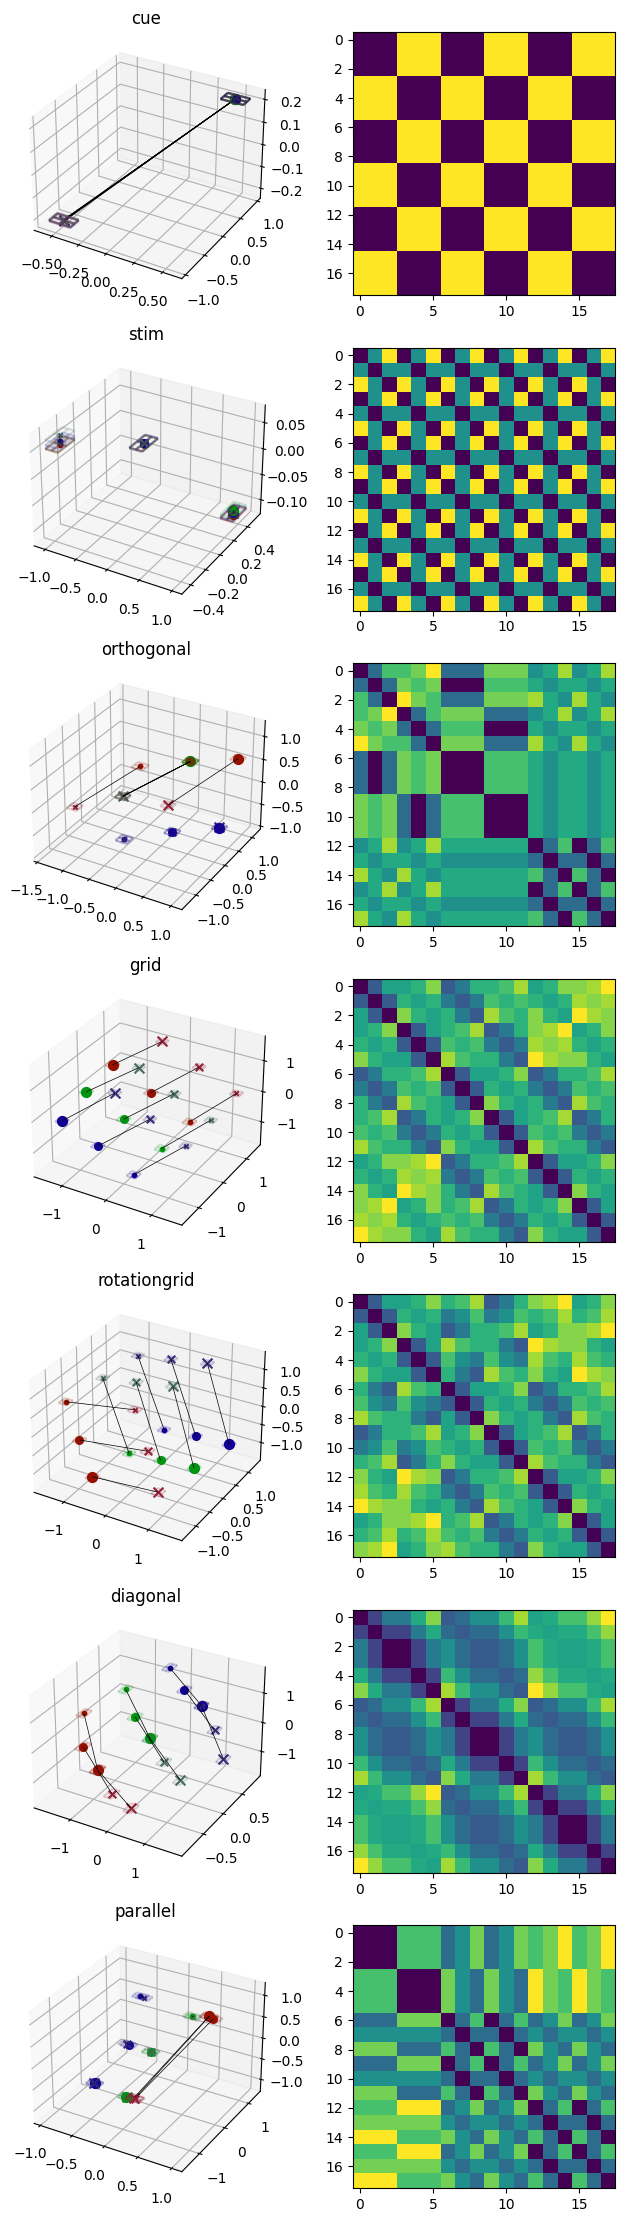

In [344]:
line_tuples = [('pain_highcue_highstim','pain_lowcue_highstim'),
               ('pain_highcue_medstim','pain_lowcue_medstim'),
               ('pain_highcue_lowstim', 'pain_lowcue_lowstim'),

             ('vic_highcue_highstim','vic_lowcue_highstim'),
             ('vic_highcue_medstim','vic_lowcue_medstim'),
             ('vic_highcue_lowstim', 'vic_lowcue_lowstim'),
               
             ('cog_highcue_highstim','cog_lowcue_highstim'),
             ('cog_highcue_medstim','cog_lowcue_medstim'),
             ('cog_highcue_lowstim', 'cog_lowcue_lowstim')
              ]

condition_df = pd.DataFrame({
    'color': ['#941100', '#941100','#941100', '#932238','#932238', '#932238',
              '#009411','#009411','#009411','#496C5D','#496C5D','#496C5D',
              '#110094','#110094','#110094','#372E78','#372E78','#372E78'],
    'marker': ['o', 'o', 'o', 'x','x','x',
               'o', 'o', 'o' ,'x','x','x',
               'o', 'o', 'o', 'x','x','x',],
    'size': list(np.tile([10,30,50], 6)), 
    'task': list(np.repeat(['pain','vicarious','cognitive'],6)),
    'cue': list(np.tile(['hC', 'hC', 'hC', 'lC', 'lC', 'lC'], 3)),
    'stim': list(np.tile(['high', 'med', 'low'], 6)), 
    'cond': ['pain_highcue_highstim','pain_highcue_medstim','pain_highcue_lowstim', 
             'pain_lowcue_highstim', 'pain_lowcue_medstim', 'pain_lowcue_lowstim',
             'vic_highcue_highstim','vic_highcue_medstim','vic_highcue_lowstim', 
             'vic_lowcue_highstim', 'vic_lowcue_medstim', 'vic_lowcue_lowstim',
             'cog_highcue_highstim','cog_highcue_medstim','cog_highcue_lowstim', 
             'cog_lowcue_highstim', 'cog_lowcue_medstim', 'cog_lowcue_lowstim']
})
plot_MDS_grid_RDMv2([cue_xy, stim_xy, orthogonal_xy, grid_xy, rotationgrid_xy, diagonal_xy, parallel_xy],
                    condition_df,
                    line_tuples,
                    ['cue', 'stim', 'orthogonal', 'grid', 'rotationgrid', 'diagonal', 'parallel'])

In [343]:
def plot_MDS_grid_RDMv2(RDM_numpy_list, condition_df, line_tuples, title):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Line3DCollection
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from matplotlib.colors import ListedColormap
    from sklearn.manifold import MDS
    from scipy.spatial.distance import pdist, squareform

    # Create a custom colormap from the hexcode colors
    cmap = ListedColormap(condition_df['color'])

    fig = plt.figure(figsize=(8,4*len(RDM_numpy_list)))
    
    for RDM_id, RDM_numpy in enumerate(RDM_numpy_list):
        # ax = fig.add_subplot(111, projection='3d')
        ax1 = fig.add_subplot(len(RDM_numpy_list), 2, 2*RDM_id+2)
        ax1.imshow(squareform(pdist(RDM_numpy)))

        
        ax = fig.add_subplot(len(RDM_numpy_list), 2, 2*RDM_id+1, projection='3d')
        model = RDM_numpy
        embedding = MDS(n_components=3, dissimilarity='precomputed')
        X_transformed = embedding.fit_transform(squareform(pdist(model)))

        points = []
        for i in range(len(model)):
            x, y, z = X_transformed[i]
            c = condition_df.loc[i, 'color']
            m = condition_df.loc[i, 'marker']
            s = condition_df.loc[i, 'size']
            condition= condition_df.loc[i, 'cond']
            points.append({'coord': (x, y, z), 'color': c, 'marker': m, 'size': s, 'cond': condition})

        points_sorted = sorted(points, key=lambda p: (p['color'], p['marker'], p['size'], p['cond']))

        # lines connecting it with matching stim/cue conditions

        lines = []
        points_sorted_df = pd.DataFrame(points_sorted)
        for i in range(len(points_sorted)-1):

            p1 = points_sorted[i]
            p2 = points_sorted[i+1]
            if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
                line = [p1['coord'], p2['coord']]
                lines.append(line)
            condition = condition_df['cond'][i]
            for c in line_tuples:
                if condition == c[0]:
                    # print(condition, c[0], c[1])
                    matching_rows1 = points_sorted_df.loc[points_sorted_df['cond'] == c[0]]
                    matching_coords1 = matching_rows1['coord']
                    matching_rows2 = points_sorted_df.loc[points_sorted_df['cond'] == c[1]]
                    matching_coords2 = matching_rows2['coord']
                    # print(matching_coords1.values,matching_coords2.values)
                    line = [matching_coords1.values[0],matching_coords2.values[0]]
                    lines.append(line)
        # plotting mesh grids
        for p in points_sorted:
            ax.scatter(*p['coord'], c=p['color'], marker=p['marker'], s=p['size'], cmap=cmap)
            x, y, z = p['coord']
            X, Y = np.meshgrid(x + np.linspace(-0.1, 0.1, 3),
                            y + np.linspace(-0.1, 0.1, 3))
            Z = np.full_like(X, z)
            ax.plot_wireframe(X, Y, Z, color=p['color'], alpha=0.2)

        lc = Line3DCollection(lines, colors='black', linewidths=0.5)
        ax.add_collection(lc)
        ax.set_title(str(title[RDM_id]))
        plt.show()
    plt.close()
        # cbar = plt.colorbar(plt.cm.ScalarMappable(norm=None, cmap=cmap))
    return fig

In [320]:
def plot_MDS_grid_RDM(RDM_numpy, condition_df, line_tuples, title):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from mpl_toolkits.mplot3d.art3d import Line3DCollection
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from matplotlib.colors import ListedColormap
    from sklearn.manifold import MDS
    from scipy.spatial.distance import pdist, squareform

    # Create a custom colormap from the hexcode colors
    cmap = ListedColormap(condition_df['color'])

    fig = plt.figure(figsize=(10,5 ))
    # ax = fig.add_subplot(111, projection='3d')
    ax1 = fig.add_subplot(1, 2, 2)
    ax1.imshow(squareform(pdist(RDM_numpy)))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    model = RDM_numpy
    embedding = MDS(n_components=3, dissimilarity='precomputed')
    X_transformed = embedding.fit_transform(squareform(pdist(model)))
    
    points = []
    for i in range(len(model)):
        x, y, z = X_transformed[i]
        c = condition_df.loc[i, 'color']
        m = condition_df.loc[i, 'marker']
        s = condition_df.loc[i, 'size']
        condition= condition_df.loc[i, 'cond']
        points.append({'coord': (x, y, z), 'color': c, 'marker': m, 'size': s, 'cond': condition})

    points_sorted = sorted(points, key=lambda p: (p['color'], p['marker'], p['size'], p['cond']))

    # lines connecting it with matching stim/cue conditions

    lines = []
    points_sorted_df = pd.DataFrame(points_sorted)
    for i in range(len(points_sorted)-1):
        
        p1 = points_sorted[i]
        p2 = points_sorted[i+1]
        if p1['color'] == p2['color'] and p1['marker'] == p2['marker'] and p1['size'] == p2['size']:
            line = [p1['coord'], p2['coord']]
            lines.append(line)
        condition = condition_df['cond'][i]
        for c in line_tuples:
            if condition == c[0]:
                # print(condition, c[0], c[1])
                matching_rows1 = points_sorted_df.loc[points_sorted_df['cond'] == c[0]]
                matching_coords1 = matching_rows1['coord']
                matching_rows2 = points_sorted_df.loc[points_sorted_df['cond'] == c[1]]
                matching_coords2 = matching_rows2['coord']
                # print(matching_coords1.values,matching_coords2.values)
                line = [matching_coords1.values[0],matching_coords2.values[0]]
                lines.append(line)

    # plotting mesh grids
    for p in points_sorted:
        ax.scatter(*p['coord'], c=p['color'], marker=p['marker'], s=p['size'], cmap=cmap)
        x, y, z = p['coord']
        X, Y = np.meshgrid(x + np.linspace(-0.1, 0.1, 3),
                        y + np.linspace(-0.1, 0.1, 3))
        Z = np.full_like(X, z)
        ax.plot_wireframe(X, Y, Z, color=p['color'], alpha=0.2)

    lc = Line3DCollection(lines, colors='black', linewidths=0.5)
    ax.add_collection(lc)
    ax.set_title(str(title))
    plt.close()
    # cbar = plt.colorbar(plt.cm.ScalarMappable(norm=None, cmap=cmap))
    return fig